### Shuang, Mar 2022

### 1. Data Introduction & Research Questions

#### Prompt: Why did you choose it? Describe the dataset you chose. What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup?

Back when I was doing a consulting project about import wines, the origin country and the types of wines are important indicators of the price and quality of wines. So, when I browse the numerous datasets available on Kaggle, I came across this dataset about wines that immediately caught my attention. 

The wine dataset is donated by Stefan Aeberhard in 1991. 

There are 178 observations. The dataset measures wines in 13 attributes/features, including Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, and Proline. These attributes are collected through chemical analysis.

The grapes that are used to make the wines are grown in the same region in Italy but there are different types/cultivars among these grapes.

The original dataset - https://archive.ics.uci.edu/ml/datasets/wine
Kaggle link of the same dataset - https://www.kaggle.com/harrywang/wine-dataset-for-clustering

#### Prompt: Define a research question. What are you trying to predict? Describe what you're trying to accomplish?

RQ: Is it feasible to cluster these wines based on their attributes/features using the unsupervised kMeans clustering? If so, how well would the kMeans model perform?

### 2. Load the Data & Sanity Check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the data
data= pd.read_csv("wine-clustering.csv")

In [3]:
# Check the first rows of the data
data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [4]:
# Check the last rows of the data
data.tail(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
# Check the dimensions
data.shape

(178, 13)

In [6]:
# check for na values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
# Describe the data briefly
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 3. Data pre-processing: Feature scaling
In the original link of the wine dataset, it suggest to standardise the variables.

In [8]:
# Use the standard scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### 4. Run the kMeans Clustering Models

#### Prompt: Why is this algorithm a good way of answering your research question? 
kMeans clustering is good at data exploration, finding the unknown patterns. In this case, kMeans is a perfect solution to reveal patterns of wines since I have no expert knowledge of how different types of wines have different level of attributes. Also, kMeans easy to implement and is less computationally intensive.

#### Prompt: Tinker with parameters at least 3 times

1. Run the kMeans model using all 13 features
2. Apply PCA to reduce the number of fearues, then run the kMeans model
3. Manually select certain features that are intuitively closely related to the types of wines, then run the kMeans model

### Model 1: Use all 13 features

In [9]:
# Iterate through different numbers of clusters to find the minimun of within cluster variation
# Create an empty list of within cluster variation
wcss = []
# Run a for loop and store the output
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 30)
    # fit the data
    kmeans.fit(data_scaled)
    # append the wcss in the empty list
    wcss.append(kmeans.inertia_)

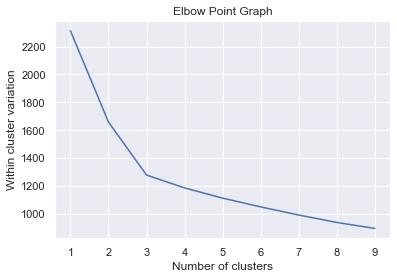

In [10]:
# elbow points graph
sns.set()
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster variation")
plt.title('Elbow Point Graph')
plt.show()

##### The elbow graph above shows the optimal number of cluster is 3. After the number of 3, the within cluster variance drops slowly.

In [11]:
# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 335)

In [12]:
# Return the labels of clusters
y_scaled = kmeans.fit_predict(data_scaled)

In [13]:
# Show the predicted/clustered labels
y_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

#### Measure the accuracy

##### In the original data set, there are labels 1, 2, 3, indicating different wine types. So, it is feasible to measure the accuracy by comparing the predicted results of the kMeans and the original labels.

In [14]:
# Load the data with labels provided by the donator of this data set
data_labeled = pd.read_csv("wine.txt", sep= ',', header=None)

In [15]:
# The first column indicates the types of wines
data_labeled.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [16]:
# Name the columns
data_labeled.columns =['OriginalLabel','Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

In [17]:
data_labeled.tail(1)

,OriginalLabel,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
177,3,14.13,4.1,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.6,560


In [18]:
# Map the original labels to A, B, C 
conditions = [(data_labeled['OriginalLabel'] == 1), (data_labeled['OriginalLabel'] == 2),
              (data_labeled['OriginalLabel'] == 3)]
labels_con = ['A', 'B', 'C']
data_labeled['LabelConverted'] = np.select(conditions, labels_con)

In [19]:
# Store the original labels of A, B, C to a numpy array
original_label = data_labeled['LabelConverted']
original_label = original_label.to_numpy()

In [20]:
original_label

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=objec

#### Swapped the predicted labels to 'A', 'B', 'C'

In [21]:
# Swap labels based on the value of Alchohol
# Supposed that A>C>B
data2 = data.copy()
data2['y_pred'] = y_scaled  
# Calculate the average alcohol based on predicted value
alc0 = np.mean(data2[data2['y_pred']==0]['Alcohol'])
alc1 = np.mean(data2[data2['y_pred']==1]['Alcohol'])
alc2 = np.mean(data2[data2['y_pred']==2]['Alcohol'])

In [22]:
# Swap label
data2['y_pred_new'] = 3

if (alc0 > alc1) & (alc0 > alc2):
    data2.loc[data2.y_pred == 0, 'y_pred_new'] = 'A'
    if alc1 > alc2:
        data2.loc[data2.y_pred == 1, 'y_pred_new'] = 'C'
        data2.loc[data2.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data2.loc[data2.y_pred == 1, 'y_pred_new'] = 'B'
        data2.loc[data2.y_pred == 2, 'y_pred_new'] = 'C'
elif alc1 > alc2:
    data2.loc[data2.y_pred == 1, 'y_pred_new'] = 'A'
    if alc0 > alc2:
        data2.loc[data2.y_pred == 0, 'y_pred_new'] = 'C'
        data2.loc[data2.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data2.loc[data2.y_pred == 0, 'y_pred_new'] = 'B'
        data2.loc[data2.y_pred == 2, 'y_pred_new'] = 'C'
else:
    data2.loc[data2.y_pred == 2, 'y_pred_new'] = 'A'
    if alc0 > alc1:
        data2.loc[data2.y_pred == 0, 'y_pred_new'] = 'C'
        data2.loc[data2.y_pred == 1, 'y_pred_new'] = 'B'
    else:
        data2.loc[data2.y_pred == 0, 'y_pred_new'] = 'B'
        data2.loc[data2.y_pred == 1, 'y_pred_new'] = 'C'

In [23]:
# Store the new swapped predicted/clustered result into a numpy array
label_pred_scaled = np.array(data2['y_pred_new'])

In [24]:
# Stack the predicted label and the original label to form a new data frame
acc_scaled = np.column_stack((label_pred_scaled,original_label))
acc_df_scaled = pd.DataFrame(acc_scaled, columns = ['Predicted','Actual'])

In [25]:
# Assign '1' if the predicted label match with the original/actual label
acc_df_scaled['True'] = 0
acc_df_scaled.loc[acc_df_scaled.Predicted == acc_df_scaled.Actual, 'True'] = 1

In [26]:
# Calculate the accuracy
acc_m1 = round(np.sum(acc_df_scaled['True'])/len(acc_df_scaled['True']) *100, 2)

In [27]:
print(acc_m1)

96.63


## Model 2: Apply PCA to reduce the number of features

In [28]:
# Choose the number of components that keep 95% of the variance
pca = PCA(n_components = 0.95)

In [29]:
# fit the data_scaled 
pca.fit(data_scaled)
data_reduced = pca.transform(data_scaled)

In [30]:
# see how many number of components are left
len(data_reduced[0])

10

In [31]:
# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 33)

In [32]:
# Return the labels of clusters
y = kmeans.fit_predict(data_reduced)

In [33]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Swapped the predicted labels to 'A', 'B', 'C'

In [34]:
# Supposed that A>C>B
data3 = data.copy()
data3['y_pred'] = y
# Calculate the average alcohol based on predicted value
alc0 = np.mean(data3[data3['y_pred']==0]['Alcohol'])
alc1 = np.mean(data3[data3['y_pred']==1]['Alcohol'])
alc2 = np.mean(data3[data3['y_pred']==2]['Alcohol'])

# Swap label
data3['y_pred_new'] = 3

if (alc0 > alc1) & (alc0 > alc2):
    data3.loc[data3.y_pred == 0, 'y_pred_new'] = 'A'
    if alc1 > alc2:
        data3.loc[data3.y_pred == 1, 'y_pred_new'] = 'C'
        data3.loc[data3.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data3.loc[data3.y_pred == 1, 'y_pred_new'] = 'B'
        data3.loc[data3.y_pred == 2, 'y_pred_new'] = 'C'
elif alc1 > alc2:
    data3.loc[data3.y_pred == 1, 'y_pred_new'] = 'A'
    if alc0 > alc2:
        data3.loc[data3.y_pred == 0, 'y_pred_new'] = 'C'
        data3.loc[data3.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data3.loc[data3.y_pred == 0, 'y_pred_new'] = 'B'
        data3.loc[data3.y_pred == 2, 'y_pred_new'] = 'C'
else:
    data3.loc[data3.y_pred == 2, 'y_pred_new'] = 'A'
    if alc0 > alc1:
        data3.loc[data3.y_pred == 0, 'y_pred_new'] = 'C'
        data3.loc[data3.y_pred == 1, 'y_pred_new'] = 'B'
    else:
        data3.loc[data3.y_pred == 0, 'y_pred_new'] = 'B'
        data3.loc[data3.y_pred == 1, 'y_pred_new'] = 'C'

In [35]:
# Store the predicted/clustered result into a numpy array
label_pred = np.array(data3['y_pred_new'])

In [36]:
# Stack the predicted label and the original label to form a new data frame
acc = np.column_stack((label_pred,original_label))
acc_df = pd.DataFrame(acc, columns = ['Predicted','Actual'])

In [37]:
# Assign '1' if the predicted label match with the original/actual label
acc_df['True'] = 0
acc_df.loc[acc_df.Predicted == acc_df.Actual, 'True'] = 1

In [38]:
# Calculate the accuracy
acc_m2 =round(np.sum(acc_df['True'])/len(acc_df['True']) *100, 2)

In [39]:
print(acc_m2)

96.63


### Model 3: Experiment with selected features:
#### Alcohol, Ash, Color_Intensity

In [40]:
data_copy = data.copy()

In [41]:
data_selected = data_copy[['Alcohol','Ash', 'Color_Intensity']]

In [42]:
# Feature scaling with the standard scaler
scaler = StandardScaler()
data_scaled_selected = scaler.fit_transform(data_selected)

In [43]:
# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 33)

In [44]:
# Return the labels of clusters
y_scaled_selected = kmeans.fit_predict(data_scaled_selected)

In [45]:
print(y_scaled_selected)

[1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 0 1 1 1 1 1 1 1 1 2
 2 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 2 0 0 0 0 0 1 0 2
 0 0 0 0 0 2 0 0 2 1 2 0 0 2 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 2 2 2 0 0 0 0 0 2 2 2 0 2 0 0 2 0 2 0 1 1 2 0 1 2 2 1 2 2 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


#### Swapped the predicted labels to 'A', 'B', 'C'

In [46]:
# Supposed that A>C>B
data4 = data.copy()
data4['y_pred'] = y_scaled_selected
# Calculate the average alcohol based on predicted value
alc0 = np.mean(data4[data4['y_pred']==0]['Alcohol'])
alc1 = np.mean(data4[data4['y_pred']==1]['Alcohol'])
alc2 = np.mean(data4[data4['y_pred']==2]['Alcohol'])

# Swap label
data4['y_pred_new'] = 3

if (alc0 > alc1) & (alc0 > alc2):
    data4.loc[data4.y_pred == 0, 'y_pred_new'] = 'A'
    if alc1 > alc2:
        data4.loc[data4.y_pred == 1, 'y_pred_new'] = 'C'
        data4.loc[data4.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data4.loc[data4.y_pred == 1, 'y_pred_new'] = 'B'
        data4.loc[data4.y_pred == 2, 'y_pred_new'] = 'C'
elif alc1 > alc2:
    data4.loc[data4.y_pred == 1, 'y_pred_new'] = 'A'
    if alc0 > alc2:
        data4.loc[data4.y_pred == 0, 'y_pred_new'] = 'C'
        data4.loc[data4.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data4.loc[data4.y_pred == 0, 'y_pred_new'] = 'B'
        data4.loc[data4.y_pred == 2, 'y_pred_new'] = 'C'
else:
    data4.loc[data4.y_pred == 2, 'y_pred_new'] = 'A'
    if alc0 > alc1:
        data4.loc[data4.y_pred == 0, 'y_pred_new'] = 'C'
        data4.loc[data4.y_pred == 1, 'y_pred_new'] = 'B'
    else:
        data4.loc[data4.y_pred == 0, 'y_pred_new'] = 'B'
        data4.loc[data4.y_pred == 1, 'y_pred_new'] = 'C'

In [47]:
# Store the predicted/clustered result into a numpy array
label_pred_selected = np.array(data4['y_pred_new'])

In [48]:
# Stack the predicted label and the original label to form a new data frame
acc_selected = np.column_stack((label_pred_selected,original_label))
acc_df_selected = pd.DataFrame(acc_selected, columns = ['Predicted','Actual'])

In [49]:
# Assign '1' if the predicted label match with the original/actual label
acc_df_selected['True'] = 0
acc_df_selected.loc[acc_df_selected.Predicted == acc_df_selected.Actual, 'True'] = 1

In [50]:
# Calculate the accuracy
acc_m3 =round(np.sum(acc_df_selected['True'])/len(acc_df_selected['True']) *100, 2)

In [51]:
print(acc_m3)

40.45


### Model 4: Experiment with selected features:
#### Alcohol, Malic_Acid, Color_Intensity (Replace Ash in model 3 with Malic_Acid)

In [52]:
data_selected = data_copy[['Alcohol', 'Malic_Acid', 'Color_Intensity']]

In [53]:
# Feature scaling with the standard scaler
scaler = StandardScaler()
data_scaled_selected = scaler.fit_transform(data_selected)

In [54]:
# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 33)

In [55]:
# Return the labels of clusters
y_scaled_selected = kmeans.fit_predict(data_scaled_selected)

In [56]:
print(y_scaled_selected)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 2 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 2 0 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 0 2]


In [57]:
# Supposed that A>C>B
data5 = data.copy()
data5['y_pred'] = y_scaled_selected
# Calculate the average alcohol based on predicted value
alc0 = np.mean(data5[data5['y_pred']==0]['Alcohol'])
alc1 = np.mean(data5[data5['y_pred']==1]['Alcohol'])
alc2 = np.mean(data5[data5['y_pred']==2]['Alcohol'])

# Swap label
data5['y_pred_new'] = 3

if (alc0 > alc1) & (alc0 > alc2):
    data5.loc[data5.y_pred == 0, 'y_pred_new'] = 'A'
    if alc1 > alc2:
        data5.loc[data5.y_pred == 1, 'y_pred_new'] = 'C'
        data5.loc[data5.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data5.loc[data5.y_pred == 1, 'y_pred_new'] = 'B'
        data5.loc[data5.y_pred == 2, 'y_pred_new'] = 'C'
elif alc1 > alc2:
    data5.loc[data5.y_pred == 1, 'y_pred_new'] = 'A'
    if alc0 > alc2:
        data5.loc[data5.y_pred == 0, 'y_pred_new'] = 'C'
        data5.loc[data5.y_pred == 2, 'y_pred_new'] = 'B'
    else:
        data5.loc[data5.y_pred == 0, 'y_pred_new'] = 'B'
        data5.loc[data5.y_pred == 2, 'y_pred_new'] = 'C'
else:
    data5.loc[data5.y_pred == 2, 'y_pred_new'] = 'A'
    if alc0 > alc1:
        data5.loc[data5.y_pred == 0, 'y_pred_new'] = 'C'
        data5.loc[data5.y_pred == 1, 'y_pred_new'] = 'B'
    else:
        data5.loc[data5.y_pred == 0, 'y_pred_new'] = 'B'
        data5.loc[data5.y_pred == 1, 'y_pred_new'] = 'C'

In [58]:
# Store the predicted/clustered result into a numpy array
label_pred_selected = np.array(data5['y_pred_new'])

In [59]:
# Stack the predicted label and the original label to form a new data frame
acc_selected = np.column_stack((label_pred_selected,original_label))
acc_df_selected = pd.DataFrame(acc_selected, columns = ['Predicted','Actual'])

In [60]:
# Assign '1' if the predicted label match with the original/actual label
acc_df_selected['True'] = 0
acc_df_selected.loc[acc_df_selected.Predicted == acc_df_selected.Actual, 'True'] = 1

In [61]:
# Calculate the accuracy
acc_m4 =round(np.sum(acc_df_selected['True'])/len(acc_df_selected['True']) *100, 2)

In [62]:
print(acc_m4)

80.34


#### Prompt: Report the accuracy of your model. Either through RMSE or another metric. How did accuracy change with your parameter tinkering?

In [63]:
print('Accuracy of Model 1 with all 13 features - ' + str(acc_m1) + '%')
print('Accuracy of Model 2 using PCA - ' + str(acc_m2) + '%')
print('Accuracy of Model 3 with features as Alcohol, Ash, Color_Intensity - ' + str(acc_m3) + '%')
print('Accuracy of Model 4 with features as Alcohol, Malic_Acid, Color_Intensity - ' + str(acc_m4) + '%')

Accuracy of Model 1 with all 13 features - 96.63%
Accuracy of Model 2 using PCA - 96.63%
Accuracy of Model 3 with features as Alcohol, Ash, Color_Intensity - 40.45%
Accuracy of Model 4 with features as Alcohol, Malic_Acid, Color_Intensity - 80.34%


##### Explanation

Model 1 & Model 2: \
The reason that the accuracy of model 2 has the the accuracy as high as model 1 is that in the PCA analysis, 95% of variance is kept, and the number of features reduce by 3 (from 13 to 10). Therefore, model 1 and model 2 do not vary much.

Model 3: \
I maually picked 3 features purly based on intuition to experiment what would happen if I only keep 3 features to carry on this clustering task. And the model does not perform well, with a low accuracy of 40.45%.

Model 4:\
I replaced Ash in model 3 with Malic_Acid so that I have 3 features that are relatively easier to observe and interpret. People can have intuitive judgement on the alcohol level of wines, and the malic acid through tasting, and the color intensity through observing. So, I want to see if it is feasible to tell the type of grapes based on these 3 features. And the accuracy of 80.34% is good considering there are only 3 features.

#### Prompt: Create a visualization demonstrating your findings

In [64]:
# Make a copy of the original dataset
data_v = data.copy()

In [65]:
# Create a new column to store the cluster label
data_v['Cluster_label'] = label_pred_selected.tolist()
data_v.head(1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_label
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,A


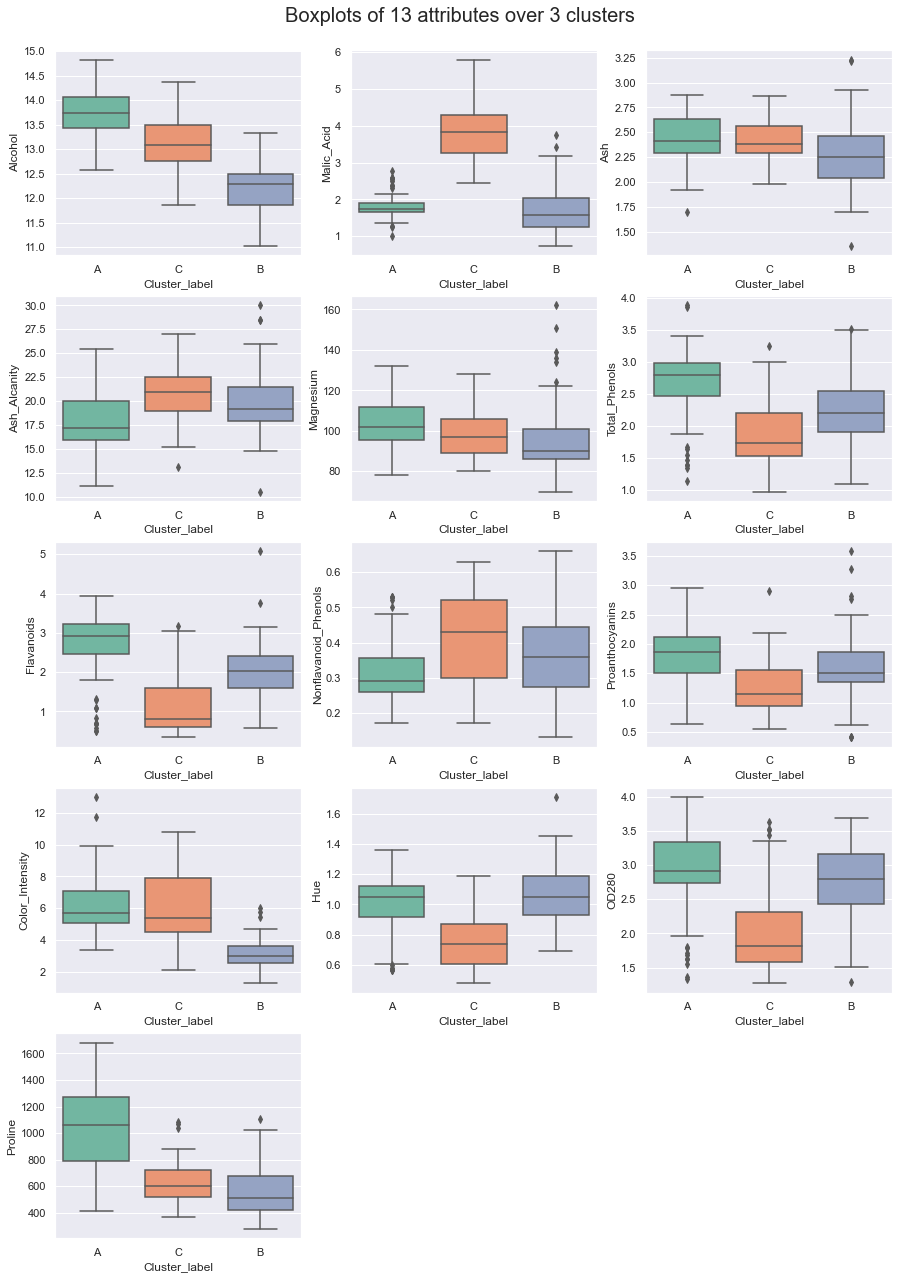

In [66]:
# Boxplots of Model 1
plt.figure(figsize = (15, 20))
for i in enumerate(data_v.columns[:-1]):
    plt.subplot(5, 3, i[0] + 1)
    sns.boxplot(x = data_v.Cluster_label, y = data_v[i[1]], palette="Set2")
    plt.xlabel('Cluster_label')
    plt.ylabel(i[1])
plt.suptitle('Boxplots of 13 attributes over 3 clusters', fontsize = 20)
plt.subplots_adjust(top= 0.95)
plt.show()

#### Findings


Based on the boxplot, these 3 clusters have obvious variance in features including Alcohol, Malic_Acid, Total_Phenols, Flavanoids, Color_Intensity, Hue, OD280, and Proline, while the variance is not much in the remaining 5 features.

This indicates that the primary differences of grape types/cultivars lie in Alcohol, Malic_Acid, Total_Phenols, Flavanoids, Color_Intensity, Hue, OD280, and Proline.

#### Prompt: What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges?

Previously, each time I run the models, the labels automatically generated are different. For instance, the first observation may be labeled as 1 in first run, and its label may become 2 in the second run. This is challenging because I want to compare the predicted labels with the original/actual labels (which are static). 

This is caused by the kMeans model itself. The changing labels are caused by the kMeans model randomly initializing its starting centroids every time.

Solution: Swap the labels based on the average level of alcohol. In the dataset with original labels, cluster A has the highest alcohol level, followed by cluster C, cluster B has the lowest level. Based on this attribute, first compute the average alcohol level for predicted clusters, then assign the corresponding labels to these cluster.

#### Prompt: Name 2 potential benefits of your model and 2 potential harms

Potential benefits:

(1) This kMeans clustering model helps reveal the underlying diffrences among grape types. Also, given no label informtion of the wines, the kMeans algorithm can help cluster the types at a fairly high accuracy rate over 95% (model 1). So, this can be applied to increase traceability of wines simply through chemical analysis, given no other information. 

(2) The model 3 with only 3 features (Alcohol, Malic_Acid, Color_Intensity) has a fairly good accuracy of 80.34%. It helps lower the barrier of chemical testing (only need to run tests for 3 measurements) to identify the type of wines. 

Potential harms:

(1) If this kMeans clustering algorithm or other more advanced methods are applied to identify the grapes that make wines. And this clustering algorithm is known to merchants. Hypothetically, merchants can change the attributes of their wines to trick the algorithm to make them 'closer' to fine wines for more profit, by adjusting the alcohol level, malic acid level, etc.

(2) Potential harm caused by hate speech detector algorithms. Many of the hate speech detecting systems are built based on explicit discriminative words. People who want to spread hate speech can simply bypass the detecting systems by using more implicit expressions, such as 'xxx people cannot do xxx', or using jargons and encoded expressions only they know. The potential harm of this is that these detection algorithms may make hate speech even harder to detect using expressions of micro-discrimination, or drive these people to more extreme attitudes. 

#### Prompt: Name one research question you might ask next for future work. Why is it important? 

What are the accuracies of all combinations of features? How to find the balance of accuracy and number of features?

Why important? \
Since I only experimented with 4 models and run into the model of 3 features with 80% accuracy, it makes me think if there are other models that have high accuracies with only 3 ~ 4 features. If so, instead of using the full model of 14 features, it is more effecient to use other models to get good accuracies from limited information.